In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
gold=pd.read_csv('gold_price_data.csv')
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gold.shape

(2290, 6)

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
len(gold)

2290

In [9]:
gold.isnull().sum(axis=0).sum()

0

In [10]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


<AxesSubplot:xlabel='GLD', ylabel='EUR/USD'>

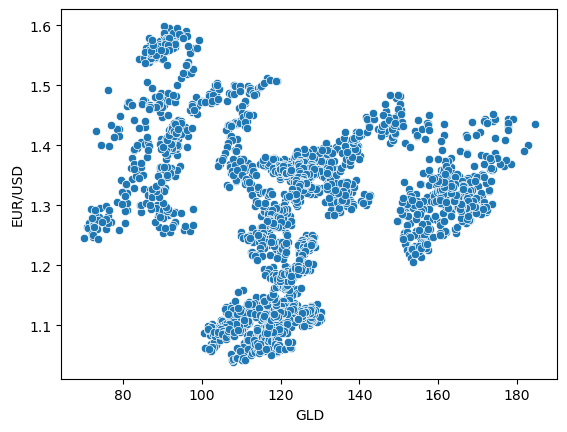

In [11]:
sns.scatterplot(data=gold,x='GLD',y='EUR/USD')

<AxesSubplot:xlabel='SPX', ylabel='EUR/USD'>

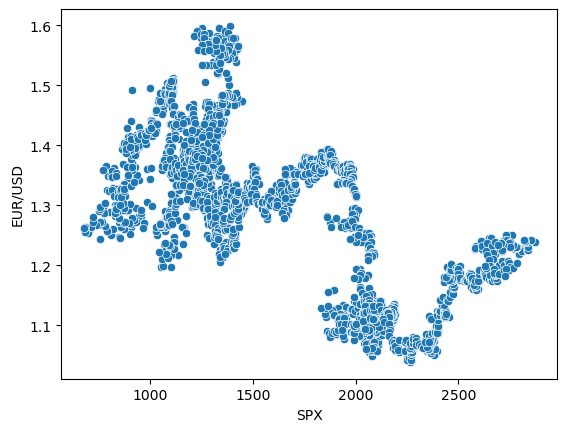

In [12]:
sns.scatterplot(data=gold,x='SPX',y='EUR/USD')

<AxesSubplot:>

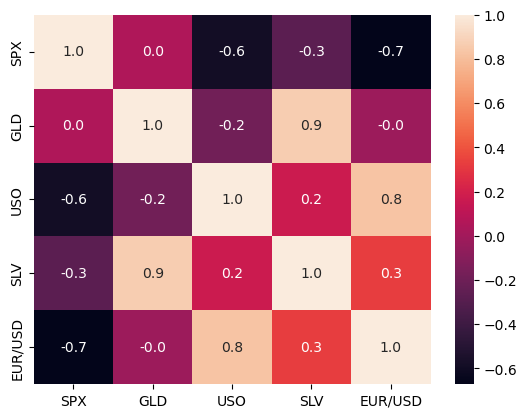

In [13]:
sns.heatmap(gold.corr(),annot=True,fmt='0.1f')

In [14]:
gold.drop(["Date"],axis=1,inplace = True)
x=gold.iloc[:, :-1]
y=gold.iloc[:,-1]
gold.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
x1.shape,x2.shape,y1.shape,y2.shape

((1832, 4), (458, 4), (1832,), (458,))

In [17]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x1,y1)

LinearRegression()

In [18]:
model_lr.score(x2,y2)*100

75.59542772613433

In [19]:
x2.head()

,SPX,GLD,USO,SLV
1971,2256.959961,110.820000,11.620000,16.190001
1163,1593.369995,151.050003,33.459999,26.700001
693,1327.219971,137.660004,39.189999,33.110001
1651,2057.639893,113.070000,19.510000,15.030000
508,1183.709961,114.629997,39.369999,17.879999


In [20]:
new_data=[[1183.709961,114.629997,39.369999,17.879999]]
model_lr.predict(new_data)

C:\Users\Prathamesh Patil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.3352524])

In [21]:
y2

1971    1.054741
1163    1.311475
693     1.373438
1651    1.122297
508     1.321283
          ...   
1524    1.229407
363     1.471194
1272    1.380529
1053    1.296512
1814    1.110901
Name: EUR/USD, Length: 458, dtype: float64

In [22]:
#save the model np need of training
#pickle() function

import pickle as pkl
filename="Gold price predection.svc"
pkl.dump(svc_model,open(filename,"wb"))

NameError: name 'svc_model' is not defined

In [2]:
import pickle
pickle.dump(model, open("gold_model.pkl", "wb"))

NameError: name 'model' is not defined

In [23]:
import pickle as pkl
filename = "Gold price predection.svc"
pkl.dump(svc_model, open(filename, "wb"))


NameError: name 'svc_model' is not defined

In [24]:
from sklearn.svm import SVC

# Train model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [25]:
import pickle as pkl


In [26]:
filename = "gold_price_prediction.pkl"
pkl.dump(model_lr, open(filename, "wb"))

In [27]:
loaded_model = pkl.load(open(filename, "rb"))

In [28]:
print(loaded_model.predict([[1183.709961,114.629997,39.369999,17.879999]]))

[1.3352524]


C:\Users\Prathamesh Patil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
